# Clase VI: Algebra numerica. curso 2020-2021. Emanuele Schiavi
Practica de apoyo de matlab a los conceptos teoricos

6.1 Metodos Directos

6.1.1 Factorizacion LU
* Resolucion de sistemas lineales
* Metodos Directos
* Factorizacion de Gauss

In [111]:
!git clone https://github.com/rollervan/FunMat.git temp
!cp -r ./temp/Codes/Images ./
!cp -r ./temp/utils ./
!rm -rf ./temp

Cloning into 'temp'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 154 (delta 46), reused 137 (delta 31), pack-reused 0
Receiving objects: 100% (154/154), 13.81 MiB | 10.20 MiB/s, done.
Resolving deltas: 100% (46/46), done.
cp: cannot stat './temp/utils': No such file or directory


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
from sympy.matrices.expressions.factorizations import svd
from scipy.linalg import lu
from IPython.display import Math, display, Latex
import time

In [14]:
# primer problema: factorizacion LU de A random
# caso cuadrado m=n
A = np.random.rand(4, 4)
P, L, U = lu(A)
R = np.linalg.norm(P@A - L@U) # calculo el residuo
print('Residuo')
display(R)
# la factorizacion es suficientemente precisa
condicionamiento = np.linalg.cond(A)
display(condicionamiento)
np.allclose(A - P @ L @ U, np.zeros((4, 4)))

Residuo


1.1754367840288835

29.079487023391135

True

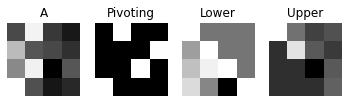

In [12]:
fig, axs = plt.subplots(1,4)
axs[0].imshow(A, cmap='gray')
axs[0].set_title('A')
axs[0].axis('off')
axs[1].imshow(P, cmap='gray')
axs[1].set_title('Pivoting')
axs[1].axis('off')
axs[2].imshow(L, cmap='gray')
axs[2].set_title('Lower')
axs[2].axis('off')
axs[3].imshow(U, cmap='gray')
axs[3].set_title('Upper')
axs[3].axis('off')
plt.show()

In [17]:
A = np.random.rand(256,128)
P, L, U = lu(A)
R = np.linalg.norm(P@A - L@U) # calculo el residuo
print('Residuo')
display(R)
# la factorizacion es suficientemente precisa
condicionamiento = np.linalg.cond(A)
display(condicionamiento)
np.allclose(A - P @ L @ U, np.zeros((256,128)))

Residuo


51.099405826133086

62.416545609153886

True

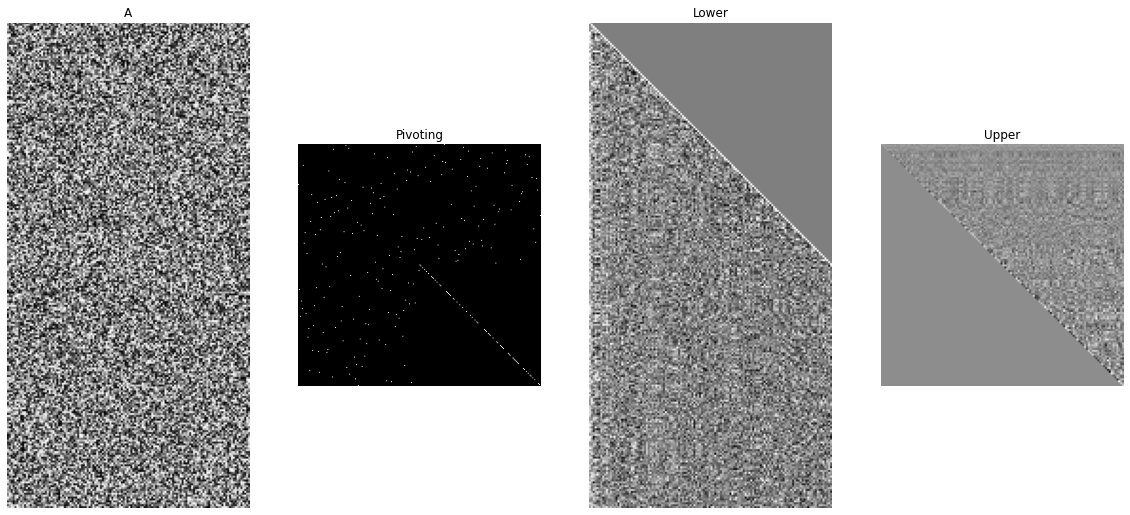

In [20]:
fig, axs = plt.subplots(1,4, figsize=(20,20))
axs[0].imshow(A, cmap='gray')
axs[0].set_title('A')
axs[0].axis('off')
axs[1].imshow(P, cmap='gray')
axs[1].set_title('Pivoting')
axs[1].axis('off')
axs[2].imshow(L, cmap='gray')
axs[2].set_title('Lower')
axs[2].axis('off')
axs[3].imshow(U, cmap='gray')
axs[3].set_title('Upper')
axs[3].axis('off')
plt.show()

## Ejemplo 6.1 Factorizacion LU: aplicacion del algoritmo paso a paso

In [38]:
A= np.array([[1,  -1,  2],  
             [2,   3,  3],
             [0,   2,  5]])
# veamos que A es no singular
d = np.linalg.det(A)
display(d)

# multiplicadores primera etapa
l_21 = A[1,0]/A[0,0]
l_31 = A[2,0]/A[0,0]

M_1= np.array([[1,    0, 0],
              [-l_21, 1, 0],
              [-l_31, 0, 1]]) 
A_1=M_1@A
display(A_1)

# multiplicadores segunda etapa
l_32 = A_1[2,1]/A_1[1,1]
M_2= np.array([[1,     0, 0],
               [0,     1, 0],
               [0, -l_32, 1]]) 

A_2=M_2@A_1
display(A_2)

# matriz triangular superior
U = A_2
L = np.array([[1,       0, 0],
              [l_21,    1, 0],
              [l_31, l_32, 1]])

print('U')
display(U)
print('L')
display(L)

L1 = np.linalg.inv(M_2@M_1)

# verifica
residuo = L@U - A
print('Residuo')
display(residuo)
np.allclose(L@U - A, np.zeros((3,3)))

# con Scipy
P, L, U = lu(A)

print('U Scipy')
display(U)
print('L Scipy')
display(L)

# observa que matlab ha hecho pivoteo para garantizar la factorizacion

27.0

array([[ 1., -1.,  2.],
       [ 0.,  5., -1.],
       [ 0.,  2.,  5.]])

array([[ 1. , -1. ,  2. ],
       [ 0. ,  5. , -1. ],
       [ 0. ,  0. ,  5.4]])

U


array([[ 1. , -1. ,  2. ],
       [ 0. ,  5. , -1. ],
       [ 0. ,  0. ,  5.4]])

L


array([[1. , 0. , 0. ],
       [2. , 1. , 0. ],
       [0. , 0.4, 1. ]])

Residuo


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

U Scipy


array([[ 2. ,  3. ,  3. ],
       [ 0. , -2.5,  0.5],
       [ 0. ,  0. ,  5.4]])

L Scipy


array([[ 1. ,  0. ,  0. ],
       [ 0.5,  1. ,  0. ],
       [ 0. , -0.8,  1. ]])

## Ejercicio 6.1 el pivoteo es necesario

In [40]:
A = np.array([[1,   1,  3],
              [2,   2,  2],
              [3,   6,  4]])

# veamos que A es no singular
d = np.linalg.det(A)
display(d)


# multiplicadores primera etapa
l_21 = A[1,0]/A[0,0]
l_31 = A[2,0]/A[0,0]

M_1= np.array([[1,    0, 0],
              [-l_21, 1, 0],
              [-l_31, 0, 1]]) 
A_1=M_1@A
display(A_1)

12.0

array([[ 1.,  1.,  3.],
       [ 0.,  0., -4.],
       [ 0.,  3., -5.]])

In [43]:
# multiplicadores segunda etapa: "explota el multiplicador".
l_32 = A_1[2,1]/A_1[1,1]
M_2= np.array([[1,     0, 0],
               [0,     1, 0],
               [0, -l_32, 1]]) 

A_2=M_2@A_1
display(A_2)

/tmp/ipykernel_6386/3404368612.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  l_32 = A_1[2,1]/A_1[1,1]
/tmp/ipykernel_6386/3404368612.py:7: RuntimeWarning: invalid value encountered in matmul
  A_2=M_2@A_1


array([[ 1.,  1.,  3.],
       [ 0.,  0., -4.],
       [nan, nan, inf]])

In [46]:
# matriz triangular superior
U = A_2
L = np.array([[1,       0, 0],
              [l_21,    1, 0],
              [l_31, l_32, 1]])

print('U')
display(U)
print('L')
display(L)

L1 = np.linalg.inv(M_2@M_1)

# verifica
residuo = L@U - A
print('Residuo')
display(residuo)

# con Scipy
P, L, U = lu(A)

print('U Scipy')
display(U)
print('L Scipy')
display(L)

# observa que Scipy ha hecho pivoteo para garantizar la factorizacion

U


array([[ 1.,  1.,  3.],
       [ 0.,  0., -4.],
       [nan, nan, inf]])

L


array([[ 1.,  0.,  0.],
       [ 2.,  1.,  0.],
       [ 3., inf,  1.]])

Residuo


/tmp/ipykernel_6386/733677712.py:12: RuntimeWarning: invalid value encountered in matmul
  L1 = np.linalg.inv(M_2@M_1)
/tmp/ipykernel_6386/733677712.py:15: RuntimeWarning: invalid value encountered in matmul
  residuo = L@U - A


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

U Scipy


array([[ 3.        ,  6.        ,  4.        ],
       [ 0.        , -2.        , -0.66666667],
       [ 0.        ,  0.        ,  2.        ]])

L Scipy


array([[1.        , 0.        , 0.        ],
       [0.66666667, 1.        , 0.        ],
       [0.33333333, 0.5       , 1.        ]])

## Ejercicio 6.2
Aplicacion: Descomposicion LU de una imagen
* LU de barbara en gris

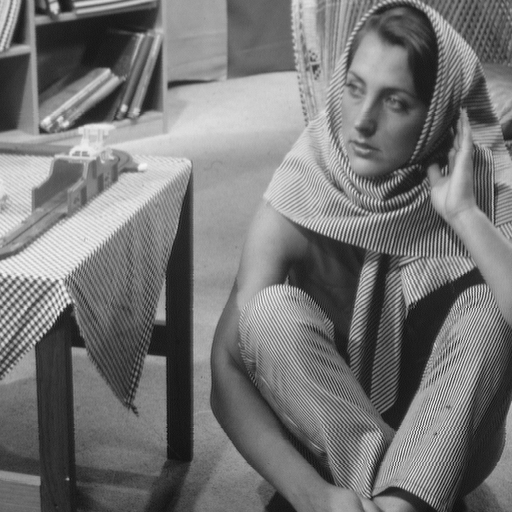

In [51]:
from PIL import Image
f1 = Image.open('Images/barbara.png')
display(f1)
f1 = np.asarray(f1) # pasamos a numpy

In [64]:
P, L, U = lu(f1)
R = np.linalg.norm(P@f1 - L@U) # calculo el residuo
print('Residuo')
display(R)
# la factorizacion es suficientemente precisa
condicionamiento = np.linalg.cond(A)
display(condicionamiento)
np.allclose(f1 - P @ L @ U, np.zeros_like(f1))


Residuo


38114.583560626765

12.34517492115627

True

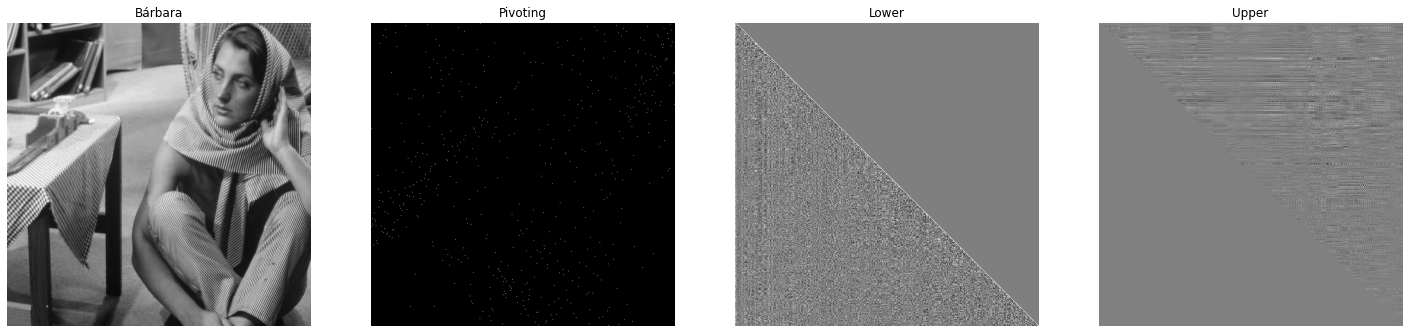

In [66]:
fig, axs = plt.subplots(1,4, figsize=(25,25))
axs[0].imshow(f1, cmap='gray')
axs[0].set_title('Bárbara')
axs[0].axis('off')
axs[1].imshow(P, cmap='gray')
axs[1].set_title('Pivoting')
axs[1].axis('off')
axs[2].imshow(L, cmap='gray')
axs[2].set_title('Lower')
axs[2].axis('off')
axs[3].imshow(U, cmap='gray')
axs[3].set_title('Upper')
axs[3].axis('off')
plt.show()

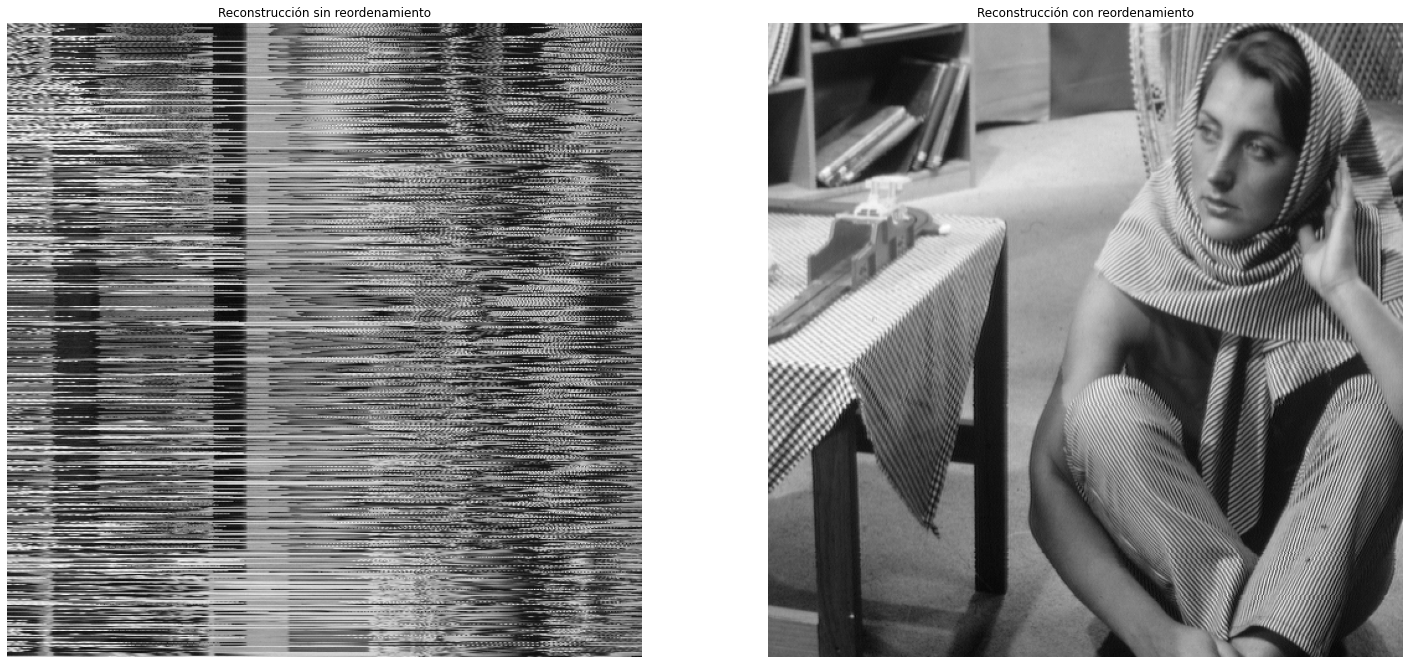

In [68]:
fig, axs = plt.subplots(1,2, figsize=(25,25))
axs[0].imshow(L @ U, cmap='gray')
axs[0].set_title('Reconstrucción sin reordenamiento')
axs[0].axis('off')
axs[1].imshow(P @ L @ U, cmap='gray')
axs[1].set_title('Reconstrucción con reordenamiento')
axs[1].axis('off')
plt.show()

# 6.2 Metodos Iterativos

## Ejercicio 6.3 Metodo de Jacobi

In [74]:
A = np.array([ [ 2, 0, 1, 1],
               [-2, 4, 0, 1],
               [-1,-1, 3, 1],
               [ 0, 3,-1, 4]])
# A diag dominante
sol = np.ones((4,1)) # solución exacta
b = A@sol # calculo el dato necesario para obtenerla.
D = np.diag(np.diag(A)) # Calculo el Precondicionador del Metodo de Jacobi

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [77]:
# condiciones necesarias
determinante = np.linalg.det(A) # existe unica solucion
print('Determinante')
display(determinante)

print('Diagonal') #no hay elementos nulos en la diagonal
display(D)
# condicion necesaria y suficiente
B = np.linalg.inv(D)@(D-A) # matriz de iteracion
print('Matrix de Iteración')
display(B)

espectro = np.linalg.eig(B)[0] #autovalores
display(espectro)
print('Condicion necesaria y suficiente de convergencia')
radio= np.max(np.abs(espectro)) # hay convergencia
print('radio')
display(radio)

Determinante


103.00000000000001

Diagonal


array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Matrix de Iteración


array([[ 0.        ,  0.        , -0.5       , -0.5       ],
       [ 0.5       ,  0.        ,  0.        , -0.25      ],
       [ 0.33333333,  0.33333333,  0.        , -0.33333333],
       [ 0.        , -0.75      ,  0.25      ,  0.        ]])

array([-0.31570598+0.4048643j , -0.31570598-0.4048643j ,
        0.31570598+0.31293039j,  0.31570598-0.31293039j])

Condicion necesaria y suficiente de convergencia
radio


0.5134056533149319

Resolución

In [105]:
def itermeth(A, b, x0, nmax, tol, P=None):
    """ITERMETH  General iterative method
     X = ITERMETH(A,B,X0,NMAX,TOL,P) attempts to solve the
     system of linear equations A*X=B for X. The N-by-N
     coefficient matrix A must be non-singular and the
     right hand side column vector B must have length
     N. If P='J' the Jacobi method is used, if P='G' the
     Gauss-Seidel method is selected. Otherwise, P is a
     N-by-N matrix that plays the role of a preconditioner
     for the dynamic Richardson method. Iterations
     stop when the ratio between the norm of the k-th
     residual and the norm of the initial residual is less
     than TOL, then ITER is the number of performed
     iterations. NMAX specifies the maximum
     number of iterations. If P is not defined, the
     dynamic unpreconditioned Richardson method
     is performed."""
    
    from scipy.linalg import lu
    from numpy.linalg import pinv, norm
    import numpy as np
    
    size = A.shape
    if size[0] == size[1]:
        n = size[0]
    
        if P == 'J':
            L = np.diag(np.diag(A))
            U = np.eye(n)
            beta, alpha = 1, 1
        elif P == 'G':
            L = np.tril(A)
            U = np.eye(n)
            beta, alpha = 1, 1
        elif P is None:
            L = np.eye(n)
            U = np.eye(n)
            beta = 0
        else:
            _, L, U = lu(A)
            beta = 0

        it = 0
        x = x0
        r = b - A @ x0
        r0 = norm(r)
        err = norm(r)
        while (err > tol) and (it < nmax):
            it += 1
            z = pinv(L)@r
            z = pinv(U)@z

            if beta == 0:
                alpha = (z.T @ r) / (z.T @ A @ z)

            x = x + alpha*z
            r = b - A@x
            err = norm(r)/r0

        return x, it
    
    else:
        print('Matrix A must be square')

In [110]:
itermax=100
tol=1e-12
x0 = np.zeros((4,1)) # rand(4,1)

tic = time.time()
x_J, iter_j = itermeth(A, b, x0, itermax, tol, 'J') # Metodo de Jacobi
toc = time.time()

tiempo_jacobi=toc - tic

print('Iteraciones metodo de Jacobi')
display(iter_j)
print('Error cometido metodo de Jacobi')
e_J = np.linalg.norm(sol-x_J) #/norm(sol)
display(e_J)

Iteraciones metodo de Jacobi


42

Error cometido metodo de Jacobi


1.408536380981976e-12

In [ ]:

A=[2 0 1 1;
   -2 4 0 1;
   -1 -1 3 1;
   0 3 -1 4] % A diag dominante
sol=ones(4,1) % solucion exacta
b=A*sol % calculo el dato necesario para obtenerla.
D=diag(diag(A)); % Calculo el Precondicionador del Metodo de Jacobi
%% condiciones necesarias
determinante=det(A) % existe unica solucion
D % no hay elementos nulos en la diagonal
%% condicion necesaria y suficiente
B=inv(D)*(D-A); % matriz de iteracion
espectro=eig(B)
disp('Condicion necesaria y suficiente de convergencia')
radio=max(abs(espectro)) % hay convergencia
%% resolucion
itermax=100
tol=1e-12
x0=zeros(4,1) % rand(4,1)
tic
[x_J,iter_j]=itermeth(A,b,x0,itermax,tol,'J'); % Metodo de Jacobi
tiempo_jacobi=toc
disp('Iteraciones metodo de Jacobi')
iter_j
disp('Error cometido metodo de Jacobi')
e_J=norm(sol-x_J) %/norm(sol)